- Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using(x-min)/(max-min). Both ways normalizes features to the range of - 1 and 1, where the former method works for positive features which is simple and serves well for the lecture's example, and the latter method works for any features.
- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $
- Z-score normalization which we will explore below.

### z-score normalization
from the model, we often want to predict the prices of houses we have not
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x ^ {(i)}_j = \dfrac{x ^ {(i)}_j - \mu_j}{\sigma_j} \tag{4}$$
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature(j) and $\sigma_j$ is the standard deviation of feature(j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i = 0} ^ {m-1} x ^ {(i)}_j \tag{5}\\
    \sigma ^ 2_j &= \frac{1}{m} \sum_{i = 0} ^ {m-1}(x ^ {(i)}_j - \mu_j) ^ 2  \tag{6}
\end{align}
$$

>**Implementation Note: ** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
seen before. Given a new x value(living room area and number of bed -
                                 rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

In [42]:
import numpy as np

X_train = np.array([[1.24e+03, 3.00e+00, 1.00e+00, 6.40e+01],
       [1.95e+03, 3.00e+00, 2.00e+00, 1.70e+01],
       [1.72e+03, 3.00e+00, 2.00e+00, 4.20e+01],
       [1.96e+03, 3.00e+00, 2.00e+00, 1.50e+01],
       [1.31e+03, 2.00e+00, 1.00e+00, 1.40e+01],
       [8.64e+02, 2.00e+00, 1.00e+00, 6.60e+01],
       [1.84e+03, 3.00e+00, 1.00e+00, 1.70e+01],
       [1.03e+03, 3.00e+00, 1.00e+00, 4.30e+01],
       [3.19e+03, 4.00e+00, 2.00e+00, 8.70e+01],
       [7.88e+02, 2.00e+00, 1.00e+00, 8.00e+01],
       [1.20e+03, 2.00e+00, 2.00e+00, 1.70e+01],
       [1.56e+03, 2.00e+00, 1.00e+00, 1.80e+01],
       [1.43e+03, 3.00e+00, 1.00e+00, 2.00e+01],
       [1.22e+03, 2.00e+00, 1.00e+00, 1.50e+01],
       [1.09e+03, 2.00e+00, 1.00e+00, 6.40e+01],
       [8.48e+02, 1.00e+00, 1.00e+00, 1.70e+01],
       [1.68e+03, 3.00e+00, 2.00e+00, 2.30e+01],
       [1.77e+03, 3.00e+00, 2.00e+00, 1.80e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 4.40e+01],
       [1.65e+03, 2.00e+00, 1.00e+00, 2.10e+01],
       [1.09e+03, 2.00e+00, 1.00e+00, 3.50e+01],
       [1.32e+03, 3.00e+00, 1.00e+00, 1.40e+01],
       [1.59e+03, 0.00e+00, 1.00e+00, 2.00e+01],
       [9.72e+02, 2.00e+00, 1.00e+00, 7.30e+01],
       [1.10e+03, 3.00e+00, 1.00e+00, 3.70e+01],
       [1.00e+03, 2.00e+00, 1.00e+00, 5.10e+01],
       [9.04e+02, 3.00e+00, 1.00e+00, 5.50e+01],
       [1.69e+03, 3.00e+00, 1.00e+00, 1.30e+01],
       [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02],
       [1.42e+03, 3.00e+00, 2.00e+00, 1.90e+01],
       [1.16e+03, 3.00e+00, 1.00e+00, 5.20e+01],
       [1.94e+03, 3.00e+00, 2.00e+00, 1.20e+01],
       [1.22e+03, 2.00e+00, 2.00e+00, 7.40e+01],
       [2.48e+03, 4.00e+00, 2.00e+00, 1.60e+01],
       [1.20e+03, 2.00e+00, 1.00e+00, 1.80e+01],
       [1.84e+03, 3.00e+00, 2.00e+00, 2.00e+01],
       [1.85e+03, 3.00e+00, 2.00e+00, 5.70e+01],
       [1.66e+03, 3.00e+00, 2.00e+00, 1.90e+01],
       [1.10e+03, 2.00e+00, 2.00e+00, 9.70e+01],
       [1.78e+03, 3.00e+00, 2.00e+00, 2.80e+01],
       [2.03e+03, 4.00e+00, 2.00e+00, 4.50e+01],
       [1.78e+03, 4.00e+00, 2.00e+00, 1.07e+02],
       [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02],
       [1.55e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [1.95e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [1.22e+03, 2.00e+00, 2.00e+00, 1.20e+01],
       [1.62e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [8.16e+02, 2.00e+00, 1.00e+00, 5.80e+01],
       [1.35e+03, 3.00e+00, 1.00e+00, 2.10e+01],
       [1.57e+03, 3.00e+00, 1.00e+00, 1.40e+01],
       [1.49e+03, 3.00e+00, 1.00e+00, 5.70e+01],
       [1.51e+03, 2.00e+00, 1.00e+00, 1.60e+01],
       [1.10e+03, 3.00e+00, 1.00e+00, 2.70e+01],
       [1.76e+03, 3.00e+00, 2.00e+00, 2.40e+01],
       [1.21e+03, 2.00e+00, 1.00e+00, 1.40e+01],
       [1.47e+03, 3.00e+00, 2.00e+00, 2.40e+01],
       [1.77e+03, 3.00e+00, 2.00e+00, 8.40e+01],
       [1.65e+03, 3.00e+00, 1.00e+00, 1.90e+01],
       [1.03e+03, 3.00e+00, 1.00e+00, 6.00e+01],
       [1.12e+03, 2.00e+00, 2.00e+00, 1.60e+01],
       [1.15e+03, 3.00e+00, 1.00e+00, 6.20e+01],
       [8.16e+02, 2.00e+00, 1.00e+00, 3.90e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 2.50e+01],
       [1.39e+03, 3.00e+00, 1.00e+00, 6.40e+01],
       [1.60e+03, 3.00e+00, 2.00e+00, 2.90e+01],
       [1.22e+03, 3.00e+00, 1.00e+00, 6.30e+01],
       [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02],
       [2.60e+03, 4.00e+00, 2.00e+00, 2.20e+01],
       [1.43e+03, 3.00e+00, 1.00e+00, 5.90e+01],
       [2.09e+03, 3.00e+00, 2.00e+00, 2.60e+01],
       [1.79e+03, 4.00e+00, 2.00e+00, 4.90e+01],
       [1.48e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 2.50e+01],
       [1.43e+03, 3.00e+00, 1.00e+00, 2.20e+01],
       [1.16e+03, 3.00e+00, 1.00e+00, 5.30e+01],
       [1.55e+03, 3.00e+00, 2.00e+00, 1.20e+01],
       [1.98e+03, 3.00e+00, 2.00e+00, 2.20e+01],
       [1.06e+03, 3.00e+00, 1.00e+00, 5.30e+01],
       [1.18e+03, 2.00e+00, 1.00e+00, 9.90e+01],
       [1.36e+03, 2.00e+00, 1.00e+00, 1.70e+01],
       [9.60e+02, 3.00e+00, 1.00e+00, 5.10e+01],
       [1.46e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [1.45e+03, 3.00e+00, 2.00e+00, 2.50e+01],
       [1.21e+03, 2.00e+00, 1.00e+00, 1.50e+01],
       [1.55e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [8.82e+02, 3.00e+00, 1.00e+00, 4.90e+01],
       [2.03e+03, 4.00e+00, 2.00e+00, 4.50e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 6.20e+01],
       [1.62e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [8.03e+02, 2.00e+00, 1.00e+00, 8.00e+01],
       [1.43e+03, 3.00e+00, 2.00e+00, 2.10e+01],
       [1.66e+03, 3.00e+00, 1.00e+00, 6.10e+01],
       [1.54e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [9.48e+02, 3.00e+00, 1.00e+00, 5.30e+01],
       [1.22e+03, 2.00e+00, 2.00e+00, 1.20e+01],
       [1.43e+03, 2.00e+00, 1.00e+00, 4.30e+01],
       [1.66e+03, 3.00e+00, 2.00e+00, 1.90e+01],
       [1.21e+03, 3.00e+00, 1.00e+00, 2.00e+01],
       [1.05e+03, 2.00e+00, 1.00e+00, 6.50e+01]])

y_train = np.array([300., 509.8, 394., 540., 415., 230., 560., 294.,
                    718.2, 200., 302., 468., 374.2, 388., 282., 311.8,
                    401., 449.8, 301., 502., 340., 400.28, 572., 264.,
                    304., 298., 219.8, 490.7, 216.96, 368.2, 280., 526.87,
                    237., 562.43, 369.8, 460., 374., 390., 158., 426.,
                    390., 277.77, 216.96, 425.8, 504., 329., 464., 220.,
                    358., 478., 334., 426.98, 290., 463., 390.8, 354.,
                    350., 460., 237., 288.3, 282., 249., 304., 332.,
                    351.8, 310., 216.96, 666.34, 330., 480., 330.3, 348.,
                    304., 384., 316., 430.4, 450., 284., 275., 414.,
                    258., 378., 350., 412., 373., 225., 390., 267.4,
                    464., 174., 340., 430., 440., 216., 329., 388.,
                    390., 356., 257.8])
X_features = ['Size (sqft)', 'Bedrooms', 'Floors', 'Age (years)']
print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')

X_train.shape = (99, 4)
y_train.shape = (99,)


In [43]:
def calculate_mean(X):
    m = X.shape[1]
    mean = np.zeros(m)
    for i in range(m):
        sum = np.sum(X[:, i])
        mean[i] = sum / m
    return mean


def calculate_std(X):
    m = X.shape[1]
    mean = calculate_mean(X)
    std = np.zeros(m)
    for i in range(m):
        sum = np.sum((X[:, i] - mean[i])**2)
        std[i] = sum / m
    return std


def z_score_normalization(X):
    m = X.shape[0]
    mean = calculate_mean(X)
    std = calculate_std(X)
    norm = np.zeros((m, X.shape[1]))

    for i in range(X.shape[1]):
        norm[:, i] = (X[:, i] - mean[i]) / std[i]

    return norm, mean, std

In [46]:
X_train_normalized, mean, std = z_score_normalization(X_train)

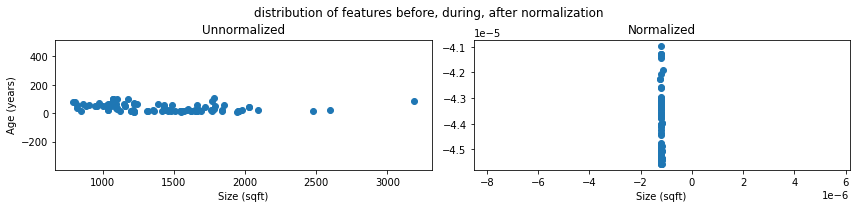

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].scatter(X_train[:, 0], X_train[:, 3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3])
ax[0].set_title('Unnormalized')
ax[0].axis('equal')

ax[1].scatter(X_train_normalized[:, 0], X_train_normalized[:, 3])
ax[1].set_xlabel(X_features[0])
ax[1].set_title('Normalized')
ax[1].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()